In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [6]:
y = y.reshape(len(y),1)

In [7]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
X = sc1.fit_transform(X)
y = sc2.fit_transform(y)

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [9]:
sc2.inverse_transform(regressor.predict(sc1.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

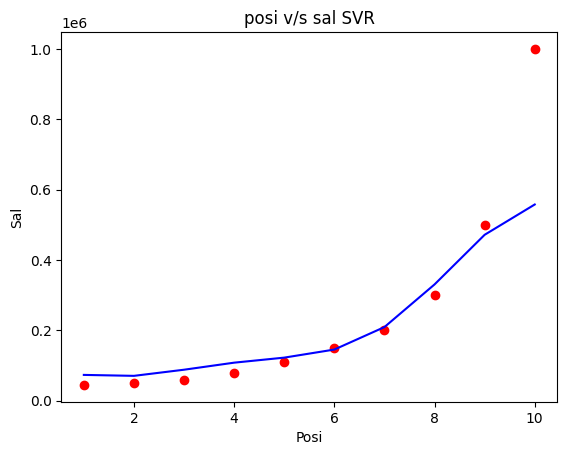

In [10]:
plt.scatter(sc1.inverse_transform(X), sc2.inverse_transform(y), color = 'red')
plt.plot(sc1.inverse_transform(X), sc2.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title("posi v/s sal SVR")
plt.xlabel("Posi")
plt.ylabel("Sal")
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_62028\1511366140.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc1.inverse_transform(X)), max(sc1.inverse_transform(X)), 0.1)


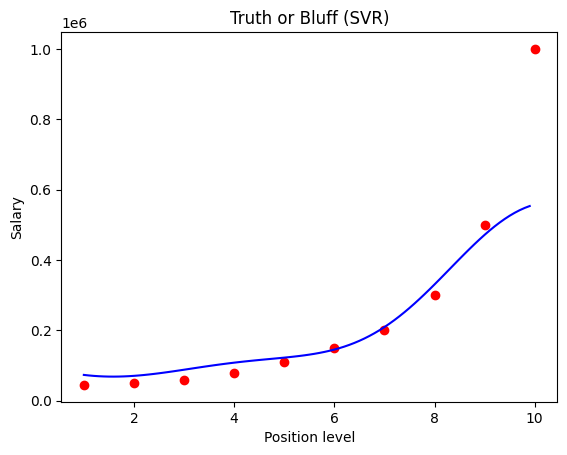

In [13]:
X_grid = np.arange(min(sc1.inverse_transform(X)), max(sc1.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc1.inverse_transform(X), sc2.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc2.inverse_transform(regressor.predict(sc1.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()